# 📌 Customer Churn Prediction Project

This notebook shows:

1️⃣ **Load Data**

2️⃣ **Data Cleaning & Encoding**

3️⃣ **EDA (5 key plots)**

4️⃣ **Train-Test Split**

5️⃣ **Logistic Regression Model**

6️⃣ **Decision Tree**

7️⃣ **Final Summary**


In [52]:
import pandas as pd
import matplotlib as plt
import seaborn as sns 

## 📂 1. Load Data

In [53]:
ds = pd.read_csv('/Users/inalali/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')

## 📂 2. Data Cleaning

In [54]:
ds['TotalCharges'] = pd.to_numeric(ds['TotalCharges'], errors='coerce')
# If TotalCharges is missing, estimate it by multiplying MonthlyCharges by tenure.
# This uses vectorized .loc indexing for better performance instead of a loop.
ds.loc[ds['TotalCharges'].isnull(), 'TotalCharges'] = ds['MonthlyCharges'] * ds['tenure']
cols = ['PhoneService', 'MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']
for x in cols:
    ds[x] = ds[x].map({'Yes':1, 'No':0})
ds = ds.fillna(0)
for x in cols:
    ds[x] = ds[x].astype(int)


In [55]:
# For columns with multiple categories, we use one-hot encoding with pd.get_dummies.
col1 = ['PaymentMethod','Contract','InternetService']
ds = pd.get_dummies(ds,columns = ['PaymentMethod','Contract','InternetService'])
cols = [ 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No']
for x in cols:
    ds[x] = ds[x].map({True: 1, False: 0})


In [56]:
# Convert binary columns (Yes/No and Male/Female) to 0/1 using a single loop and .map.
binary_columns = ['gender', 'Dependents', 'Partner', 'PaperlessBilling']
for col in binary_columns:
    if col == 'gender':
        ds[col] = ds[col].map({'Female': 1, 'Male': 0})
    else:
        ds[col] = ds[col].map({'Yes': 1, 'No': 0})

# Fill missing values in 'MultipleLines' with 0 (assumes no extra service if missing)
ds['MultipleLines'] = ds['MultipleLines'].fillna(0)


In [57]:
# For selected service and charge columns, check for any missing values and fill them with 0.
# This assumes that missing means no service or no charges recorded.
# Then convert these columns to integer type for consistency in modeling.
col2 = [
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'MonthlyCharges',
    'TotalCharges'
]

for x in col2:
    if ds[x].isna().any():
        ds[x] = ds[x].fillna(0)

for x in col2:
    ds[x] = ds[x].astype(int)



## 📊 3. EDA
Showing 5 key visual insights.

<Axes: xlabel='Churn', ylabel='count'>

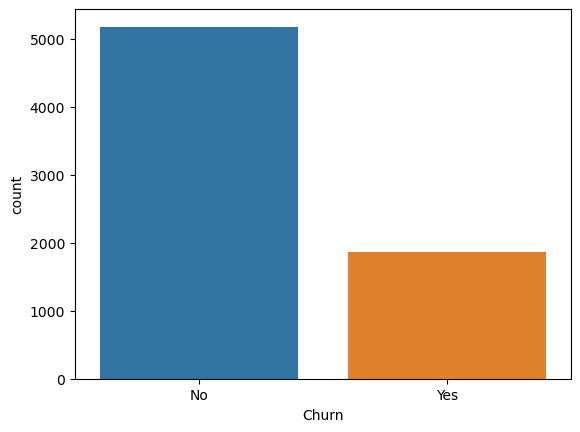

In [58]:
sns.countplot(x = 'Churn', data = ds)

<Axes: xlabel='Contract_Month-to-month', ylabel='count'>

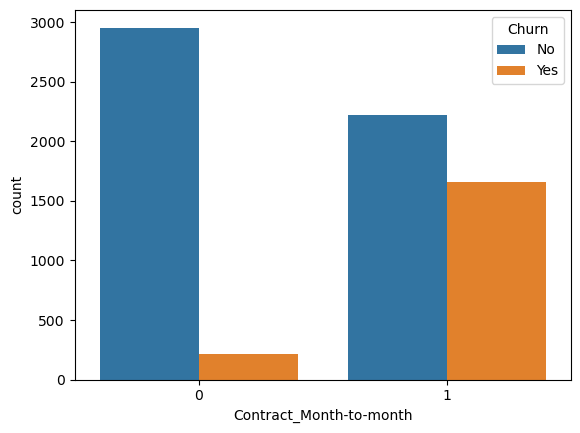

In [59]:
sns.countplot(x = 'Contract_Month-to-month', hue = 'Churn', data = ds) ## this clearly tells month to month morw ppl churn

<Axes: xlabel='Partner', ylabel='count'>

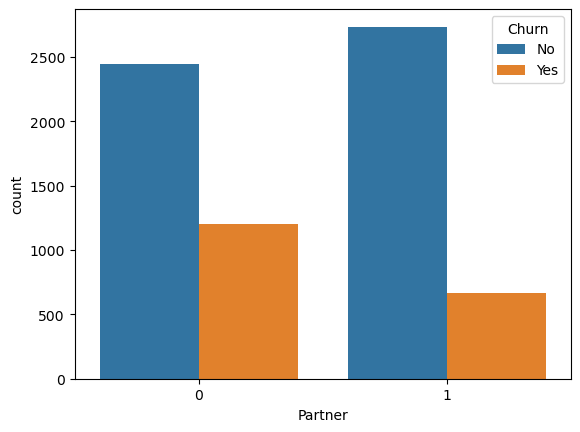

In [60]:
sns.countplot(x = 'Partner', hue = 'Churn', data = ds) ## having partner decrease teh sign of churn

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

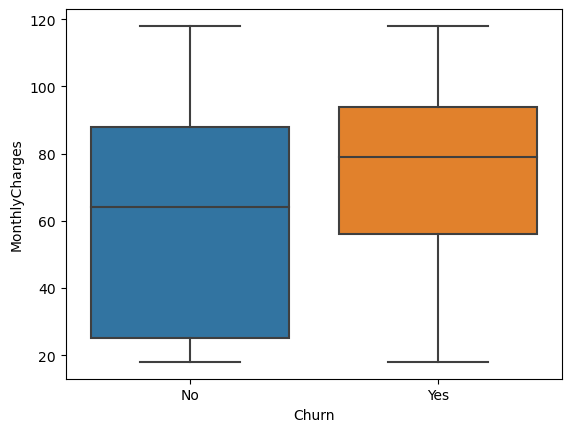

In [61]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=ds)

##Customers who churned tend to have higher monthly charges than those who didn’t.”

<Axes: xlabel='Contract_Month-to-month', ylabel='count'>

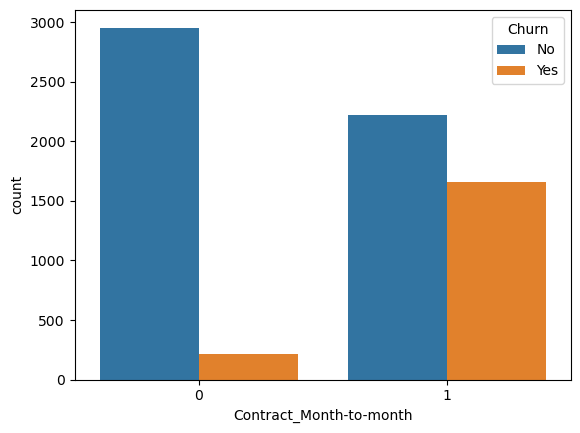

In [62]:
sns.countplot(x = 'Contract_Month-to-month', hue = 'Churn', data = ds) ## really high for month to month

## 🔀 4. Train-Test Split

In [63]:
features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges',
    'Contract_Month-to-month',
    'Contract_One year',
    'Contract_Two year',
    'PaymentMethod_Electronic check',
    'InternetService_Fiber optic',
    'OnlineSecurity',
    'TechSupport',
    'Partner',
    'Dependents',
    'PaperlessBilling',
    'SeniorCitizen'  # optional, but safe to test
]

X = ds[features]
y = ds['Churn']

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,   # 20% for test, 80% for train
    random_state=42  # for repeatability
)


## 🤖 5. Logistic Regression Model

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train) 
y_pred = model.predict(X_test)

In [69]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8112136266855926
Confusion Matrix:
 [[936 100]
 [166 207]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      0.90      0.88      1036
         Yes       0.67      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



## 🌳 6. Decision Tree Model

In [ ]:
# 1️⃣ Import
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# 2️⃣ Create the model
tree = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)

# 3️⃣ Train the model
tree.fit(X_train, y_train)

# 4️⃣ Predict on test data
y_pred_tree = tree.predict(X_test)

# 5️⃣ Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))




Decision Tree Accuracy: 0.7224982256919801

Confusion Matrix:
 [[693 343]
 [ 48 325]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.67      0.78      1036
           1       0.49      0.87      0.62       373

    accuracy                           0.72      1409
   macro avg       0.71      0.77      0.70      1409
weighted avg       0.82      0.72      0.74      1409



## 📌 Final Project Summary

**What I did:**  

Cleaned the telecom churn dataset, performed EDA to find key churn drivers, and built two prediction models (Logistic Regression & Decision Tree).

**Key Insights:**  
- Logistic Regression gave ~80% overall accuracy but ~55% recall for churners.
- The Decision Tree lowered overall accuracy to ~74% but improved recall for churners to ~77%, showing how model choice and class balancing can shift results.

**Main Drivers:**  
- Customers with month-to-month contracts, fiber optic internet, no tech support, short tenure, and high monthly charges are more likely to churn.

**Next Steps:**  
- Further improvements could include deeper parameter tuning, trying Random Forest or XGBoost, or applying SMOTE to better balance churn vs non-churn cases.
